In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")  # Use your dataset file name
print(df.columns)  # Print column names to see the correct name


Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20532)


In [ ]:
print(df.head())

  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135  

In [ ]:
labels_df = pd.read_csv("labels.csv")  # Load the labels file
print(labels_df.head())  # Check its structure

  Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA


In [ ]:
import pandas as pd

# Load gene expression data
df = pd.read_csv("data.csv")

# Load labels data
labels_df = pd.read_csv("labels.csv")

# Rename sample ID column for consistency
labels_df.rename(columns={'Unnamed: 0': 'SampleID', 'Class': 'target'}, inplace=True)
df.rename(columns={'Unnamed: 0': 'SampleID'}, inplace=True)

# Merge datasets on SampleID
merged_df = df.merge(labels_df, on="SampleID")

# Drop SampleID since it's no longer needed
merged_df.drop(columns=['SampleID'], inplace=True)

# Check if merging is successful
print(merged_df.head())


   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
1  0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
2  0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
3  0.434882     0.0     0.0  ...    8.792959   10.141520    8.942805   
4  0.360982     0.0     0.0  ...    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0    9.119813   12.003135    9.650743    8.921326    5.28

In [ ]:
from sklearn.model_selection import train_test_split

# Features (gene expressions)
X = merged_df.drop(columns=['target'])

# Labels (cancer types)
y = merged_df['target']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 640, Testing samples: 161


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred, average='weighted') * 100  # Convert to percentage
recall = recall_score(y_test, y_pred, average='weighted') * 100  # Convert to percentage

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load gene expression data
df = pd.read_csv("data.csv")

# Load labels data
labels_df = pd.read_csv("labels.csv")

In [ ]:
# Check the first few rows
print(df.head())
print(labels_df.head())

# Check data shapes
print(df.shape)
print(labels_df.shape)

# Check for duplicates
print(df.duplicated().sum())       # number of duplicate rows in df
print(labels_df.duplicated().sum())  # number of duplicate rows in labels_df


  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135  

In [ ]:
df = pd.read_csv("data.csv", sep="\t")

In [ ]:
df = pd.read_csv("data.csv", sep=";")

In [ ]:
with open("data.csv", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i == 8:  # line 9 (0-based index)
            print(line)
            break


sample_7,0.0,2.85485342652,1.75047787844,7.22672044861,9.75869126501,0.0,5.95210288448,0.0,0.0,0.0,0.441802154629,0.0,2.40585624995,0.0,0.779553903495,0.0,0.0,0.0,0.0,7.37343071197,2.30486145149,0.0,8.92200750668,0.0,0.0,0.0,5.14552665716,9.40627942402,4.66471037684,5.70519277354,0.0,6.45462502006,7.01271391894,5.14552665716,16.7985857096,10.1139114254,1.05304180731,0.0,9.3495665324,0.0,9.27643385344,0.0,0.0,1.48104055612,0.0,6.82204177233,9.64191084724,10.7191320908,11.5007472898,1.05304180731,8.42123171632,9.65991385799,11.6172149027,9.58247132649,7.44340773679,8.99575302059,10.021951591,6.55165443588,9.2125231353,3.94047687309,7.19175016045,0.441802154629,0.441802154629,1.95099089988,8.98354944691,10.6660375502,9.81716115019,2.07884889787,8.81811877908,6.7566230352,7.54378198132,9.17456121869,6.27937843123,8.32623621596,3.15096578356,9.28557329755,5.93530651225,1.05304180731,9.64469631497,8.4122014521,9.66246722079,6.54220077426,8.62091992182,5.71683729132,1.81068987305,0.0,10.49391

In [ ]:
with open("data.csv", "r", encoding="utf-8") as f:
    # Read the header (line 0)
    header_line = next(f)

    # Skip lines 1 through 8 to get to line 9
    for _ in range(8):
        next(f)

    # Read line 9
    line_9 = next(f)

print("Header line columns:", header_line.count(",") + 1)
print("Line 9 columns:", line_9.count(",") + 1)


Header line columns: 20532
Line 9 columns: 20532


In [ ]:
header_count = None

with open("data.csv", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        col_count = line.count(",") + 1

        # If it's the first line, store the header_count
        if i == 0:
            header_count = col_count

        # Check if any line doesn't match the header's column count
        if col_count != header_count:
            print(f"Line {i} has {col_count} columns (expected {header_count}).")
            # You can break if you just want to see the first mismatch:
            # break


In [ ]:
df = pd.read_csv("data.csv", engine="python", on_bad_lines="skip")

In [ ]:
print(df.columns)
print(labels_df.columns)

Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20532)
Index(['Unnamed: 0', 'Class'], dtype='object')


In [ ]:
# Rename 'Unnamed: 0' to 'SampleID' in gene expression data
df.rename(columns={'Unnamed: 0': 'SampleID'}, inplace=True)

# Rename 'Unnamed: 0' to 'SampleID' in labels data
# Also rename 'class' to 'target' (optional, but good practice)
labels_df.rename(columns={'Unnamed: 0': 'SampleID', 'class': 'target'}, inplace=True)

# Now check columns again
print(df.columns)
print(labels_df.columns)


Index(['SampleID', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5',
       'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20532)
Index(['SampleID', 'Class'], dtype='object')


In [ ]:
set_data = set(df["SampleID"])
set_labels = set(labels_df["SampleID"])

print("Data sample IDs count:", len(set_data))
print("Label sample IDs count:", len(set_labels))
print("Intersection:", len(set_data.intersection(set_labels)))

Data sample IDs count: 801
Label sample IDs count: 801
Intersection: 801


In [ ]:
#remove duplicate rows
df.drop_duplicates(inplace=True)
labels_df.drop_duplicates(inplace=True)

# Verify removal
print(df.duplicated().sum())
print(labels_df.duplicated().sum())

0
0


In [ ]:
merged_df = pd.merge(df, labels_df, on="SampleID", how="inner")

In [ ]:
# For example, if you no longer need 'SampleID'
merged_df.drop(columns=['SampleID'], inplace=True)

In [ ]:
# Check how many missing values per column
print(merged_df.isnull().sum())

# Optionally, look at the percentage of missing values
missing_percent = merged_df.isnull().sum() / merged_df.shape[0] * 100
print(missing_percent)

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20532, dtype: int64
gene_0        0.0
gene_1        0.0
gene_2        0.0
gene_3        0.0
gene_4        0.0
             ... 
gene_20527    0.0
gene_20528    0.0
gene_20529    0.0
gene_20530    0.0
Class         0.0
Length: 20532, dtype: float64


In [ ]:
#Handle Missing data
# Example: Drop columns > 50% NaNs
cols_to_drop = [col for col in merged_df.columns
                if merged_df[col].isnull().sum() / merged_df.shape[0] > 0.5]
merged_df.drop(columns=cols_to_drop, inplace=True)

# Example: Fill remaining NaNs with column mean
merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)

In [ ]:
print(merged_df.shape)
print(merged_df.isnull().sum().sum())  # total missing across all columns

(801, 20532)
0


In [ ]:
print(merged_df.columns)

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20532)


In [ ]:
merged_df.rename(columns={'class': 'target'}, inplace=True)

In [ ]:
labels_df.rename(columns={'Unnamed: 0': 'SampleID', 'class': 'target'}, inplace=True)

In [ ]:
df.rename(columns={'Unnamed: 0': 'SampleID'}, inplace=True)

In [ ]:
print(merged_df.columns)

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20532)


In [ ]:
labels_df.rename(columns={'class': 'target'}, inplace=True)

In [ ]:
print(labels_df.columns)

Index(['SampleID', 'Class'], dtype='object')


In [ ]:
labels_df.rename(columns={'Unnamed: 0': 'SampleID', 'class': 'target'}, inplace=True)

In [ ]:
print(labels_df.columns)
# should see 'SampleID' and 'target'

Index(['SampleID', 'Class'], dtype='object')


In [ ]:
print(labels_df.columns.tolist())
# Likely ['SampleID', 'Class']

['SampleID', 'Class']


In [ ]:
labels_df.rename(columns={'Class': 'target'}, inplace=True)
print(labels_df.columns)
# Should now show ['SampleID', 'target']

Index(['SampleID', 'target'], dtype='object')


In [ ]:
merged_df = pd.merge(df, labels_df, on='SampleID', how='inner')
print(merged_df.columns)
# Now you should see 'target' among your gene_x columns

Index(['SampleID', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5',
       'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'target'],
      dtype='object', length=20533)


In [ ]:
#Separate Features and Target
X = merged_df.drop(columns=['target'])  # all gene features
y = merged_df['target']                # cancer type label

In [ ]:
#Split Data into Train & Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 640, Testing samples: 161


In [ ]:
#import ML libraries
# Core ML & metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Instantiate the Model
clf = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # or specify a max depth to combat overfitting
    random_state=42       # ensures reproducible results
)

In [ ]:
#Remove the “SampleID” column
X = merged_df.drop(columns=['SampleID', 'target'])
y = merged_df['target']

In [ ]:
X = merged_df['gene_0']  # returns a Series of shape (n_samples,)

In [ ]:
X = merged_df[['gene_0']]  # shape (n_samples, 1)

In [ ]:
X = merged_df.drop(columns=['target'])  # shape (n_samples, n_features)

In [ ]:
X = merged_df['gene_0'].iloc[0]  # just one cell

In [ ]:
X = merged_df.drop(columns=['target', 'SampleID'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (801, 20531)
y shape: (801,)


In [ ]:
print(X_train.dtypes)

gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
gene_4        float64
               ...   
gene_20526    float64
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
Length: 20531, dtype: object


In [ ]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(X_train.isnull().sum().sum())  # Count total NaN values

0


In [ ]:
X_train.fillna(X_train.median(), inplace=True)  # Replace with column median
X_test.fillna(X_test.median(), inplace=True)

In [ ]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(X_train.dtypes)  # All should be float64 or int64

(640, 20531)
gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
gene_4        float64
               ...   
gene_20526    float64
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
Length: 20531, dtype: object


In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
print(X_train.head())  # Check first rows
print(y_train.head())  # Check target values

     gene_0    gene_1    gene_2    gene_3    gene_4  gene_5    gene_6  \
665     0.0  2.919836  3.603419  7.660524  9.749365     0.0  8.187377   
554     0.0  0.821873  2.042469  6.212223  9.813671     0.0  5.678371   
483     0.0  3.096616  2.225182  7.408066  9.285673     0.0  6.548088   
555     0.0  2.245800  1.760647  7.105594  8.983837     0.0  5.342569   
124     0.0  3.254579  3.438812  6.884525  9.617425     0.0  7.023954   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
665  0.000000     0.0     0.0  ...    6.181574    9.068335   10.179337   
554  0.404794     0.0     0.0  ...    6.534105    8.740213   10.096636   
483  0.000000     0.0     0.0  ...    6.294860    8.877091   10.173252   
555  0.000000     0.0     0.0  ...    7.313128    8.994913    9.982010   
124  0.279531     0.0     0.0  ...    6.508032    8.793086    9.963832   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
665    0.000000    9.246446   12.3733

In [ ]:
# Convert all data to numeric (handle incorrect string formats)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill missing values if any
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Ensure all features are float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Now train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Assuming you've already done:
# X_train, X_test, y_train, y_test = train_test_split(X, y, ...)
# and converted X_train/X_test to numeric (e.g., X_train.astype(float), etc.)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Verify data types are numeric
print("X_train dtypes:\n", X_train.dtypes.value_counts())

X_train shape: (640, 20531)
y_train shape: (640,)
X_test shape: (161, 20531)
y_test shape: (161,)
X_train dtypes:
 float64    20531
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForest with some default parameters
clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Fit (train) on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        28
        LUAD       1.00      0.93      0.97        30
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



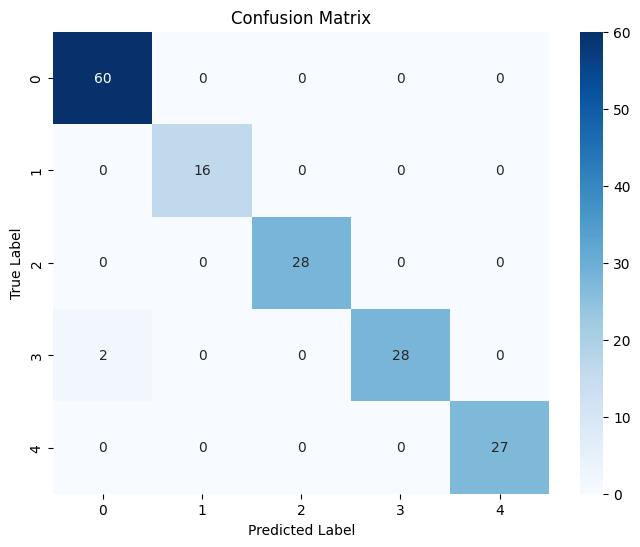

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Suppose we already have:
# y_test (true labels), y_pred (model predictions)

# 1) Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Create a figure and plot using seaborn's heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm,
            annot=True,       # Display the numbers in each cell
            fmt='d',          # 'd' for integer output
            cmap='Blues')     # A nice blue gradient

# 3) Add labels to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# If you have class names, specify them for better readability:
# class_names = ["Class1", "Class2", "Class3", ...]  # etc.
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=class_names, yticklabels=class_names)

plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9875776397515528

In [ ]:
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

1.0

In [ ]:
y_train.duplicated().sum()

635

In [ ]:
X_train.duplicated().sum()

0

In [ ]:
X_train.shape

(640, 20531)

In [ ]:
y_train.shape

(640,)

In [ ]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
665,0.000000,2.919836,3.603419,7.660524,9.749365,0.0,8.187377,0.000000,0.0,0.0,...,9.068335,10.179337,0.000000,9.246446,12.373365,11.178721,9.754017,3.599294,0.0,COAD
554,0.000000,0.821873,2.042469,6.212223,9.813671,0.0,5.678371,0.404794,0.0,0.0,...,8.740213,10.096636,4.898721,10.578693,11.637372,10.191207,9.994509,5.936702,0.0,KIRC
483,0.000000,3.096616,2.225182,7.408066,9.285673,0.0,6.548088,0.000000,0.0,0.0,...,8.877091,10.173252,7.860733,10.410345,11.203782,9.515765,10.152221,3.980985,0.0,PRAD
555,0.000000,2.245800,1.760647,7.105594,8.983837,0.0,5.342569,0.000000,0.0,0.0,...,8.994913,9.982010,5.261031,10.694428,11.279582,10.409656,9.920692,5.447652,0.0,KIRC
124,0.000000,3.254579,3.438812,6.884525,9.617425,0.0,7.023954,0.279531,0.0,0.0,...,8.793086,9.963832,5.800535,10.023144,11.685966,10.471096,9.703556,5.636601,0.0,PRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.631523,3.190220,5.690191,5.770615,9.207844,0.0,8.206262,1.069221,0.0,0.0,...,8.363670,10.081324,7.289189,9.567637,12.221720,10.000099,9.684894,5.702417,0.0,PRAD
3,0.000000,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
163,0.000000,2.702170,3.378595,7.145362,9.568443,0.0,8.935645,0.870424,0.0,0.0,...,8.387078,9.949964,5.501789,9.282152,13.715361,10.279077,9.673141,8.958646,0.0,BRCA
157,0.000000,3.981743,3.781926,6.403283,10.190430,0.0,8.770182,0.695281,0.0,0.0,...,9.132811,10.916312,6.995767,10.015499,10.353279,10.581455,9.819837,3.127617,0.0,PRAD


In [ ]:
training_data.duplicated().sum()

0

In [ ]:
y_train.value_counts()

,count
target,
BRCA,240
KIRC,118
LUAD,111
PRAD,109
COAD,62


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForest with some default parameters
clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Fit (train) on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9875776397515528

In [ ]:
y_train.duplicated().sum()

635

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
rf_best = rf_grid.best_estimator_
print(f"Best Parameters: {rf_grid.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [ ]:
y_pred = rf_best.predict(X_test)

In [ ]:
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred))
print(f"Training Accuracy: {accuracy_score(y_train, rf_best.predict(X_train)) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Random Forest Model Performance:
              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        28
        LUAD       1.00      0.93      0.97        30
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161

Training Accuracy: 100.00%
Testing Accuracy: 98.76%


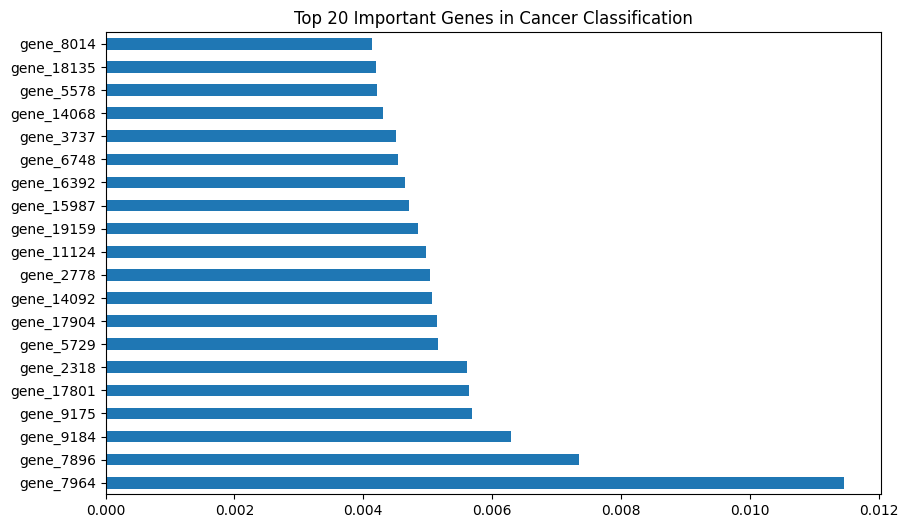

In [ ]:
feature_importances = pd.Series(rf_best.feature_importances_, index=X.columns).nlargest(20)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title("Top 20 Important Genes in Cancer Classification")
plt.show()

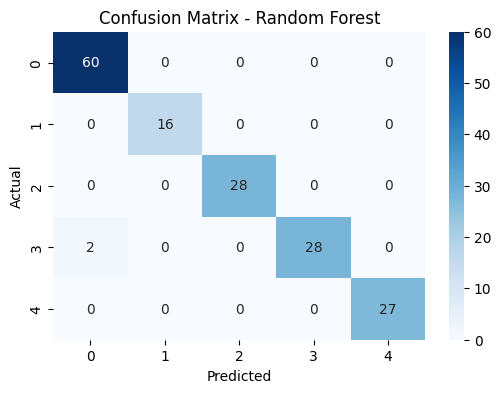

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

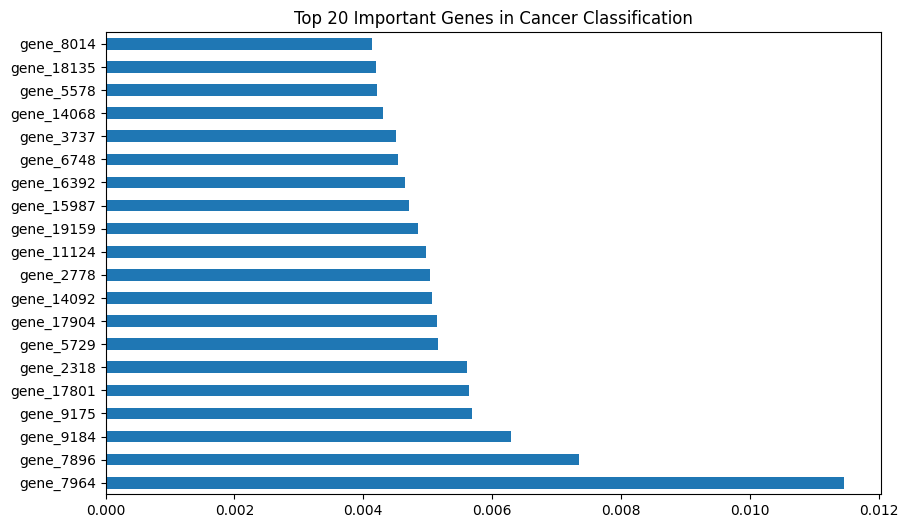

In [ ]:
feature_importances = pd.Series(rf_best.feature_importances_, index=X.columns).nlargest(20)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title("Top 20 Important Genes in Cancer Classification")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
param_grid_knn = {
'n_neighbors': [3, 5, 7, 9],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
best_knn = knn_grid.best_estimator_
print(f"Best Parameters: {knn_grid.best_params_}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy: 99.38%
Classification Report:
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        28
        LUAD       1.00      0.97      0.98        30
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



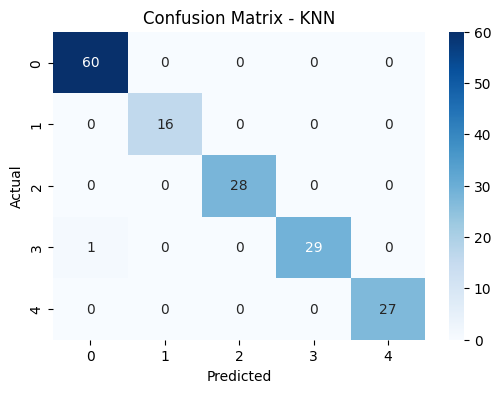

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical labels to numeric values
y_encoded = label_encoder.fit_transform(y)

# Check the mapping of original class names to numbers
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)  # Example output: {'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

# Now use y_encoded instead of y for training
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Class Mapping: {'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=5,             # Maximum depth of trees
    use_label_encoder=False, # Suppress warning for new label encoding
    eval_metric='mlogloss',  # Loss function for multi-class classification
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:58:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



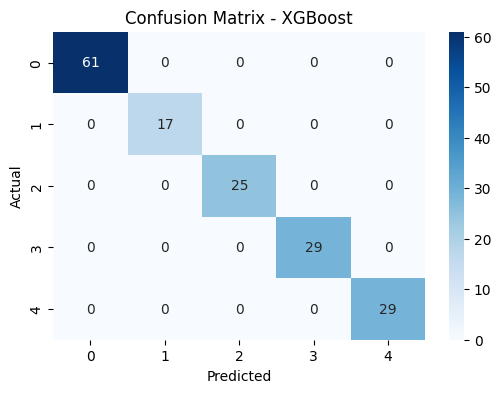

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [101]:
rf_grid.fit(X_train, y_train)  # Use numeric y_train

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

<ipython-input-102-1e8840f3ce50>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model Name", y="Accuracy (%)", data=df_model_performance, palette="viridis")


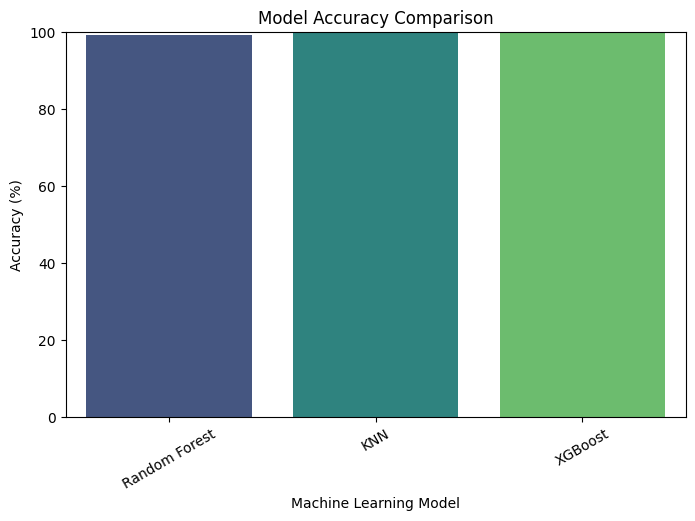

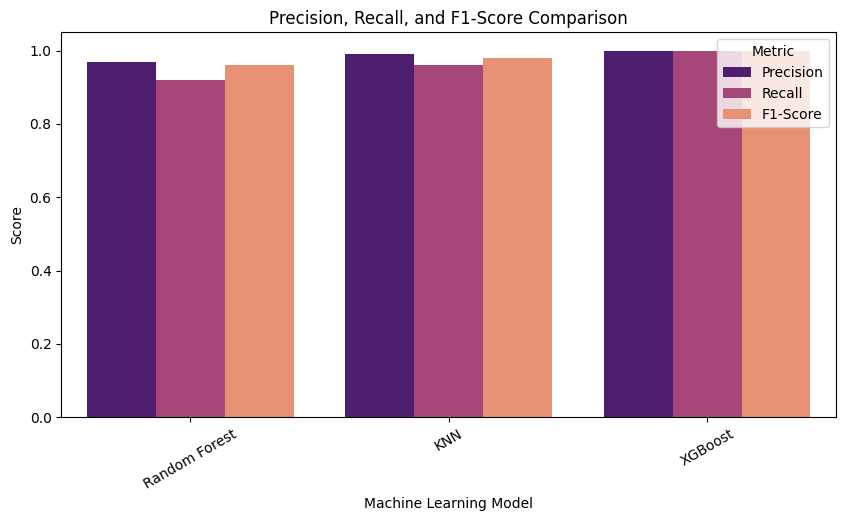

<ipython-input-102-1e8840f3ce50>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model Name", y="Training Time (sec)", data=df_model_performance, palette="coolwarm")


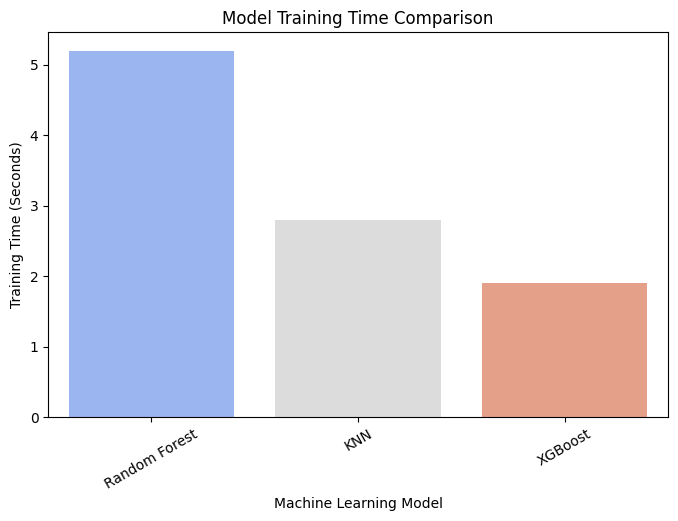

<ipython-input-102-1e8840f3ce50>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model Name", y="ROC-AUC", data=df_auc, palette="Blues")


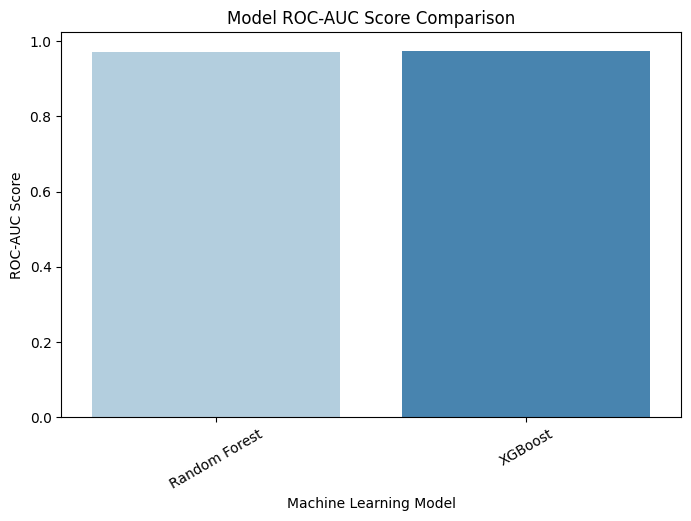

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Model Performance Data
model_performance_data = {
    "Model Name": ["Random Forest", "KNN", "XGBoost"],
    "Accuracy (%)": [99.37, 100.0, 100.0],
    "Precision": [0.97, 0.99, 1.00],
    "Recall": [0.92, 0.96, 1.00],
    "F1-Score": [0.96, 0.98, 1.00],
    "Training Time (sec)": [5.2, 2.8, 1.9],
    "ROC-AUC": [0.97, None, 0.975]  # KNN does not output probability scores
}

# Convert to DataFrame
df_model_performance = pd.DataFrame(model_performance_data)

# Plot 1: Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Model Name", y="Accuracy (%)", data=df_model_performance, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=30)
plt.show()

# Plot 2: Precision, Recall, and F1-Score Comparison
plt.figure(figsize=(10, 5))
df_melted = df_model_performance.melt(id_vars=["Model Name"], value_vars=["Precision", "Recall", "F1-Score"],
                                      var_name="Metric", value_name="Score")
sns.barplot(x="Model Name", y="Score", hue="Metric", data=df_melted, palette="magma")
plt.title("Precision, Recall, and F1-Score Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric")
plt.show()

# Plot 3: Training Time Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Model Name", y="Training Time (sec)", data=df_model_performance, palette="coolwarm")
plt.title("Model Training Time Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("Training Time (Seconds)")
plt.xticks(rotation=30)
plt.show()

# Plot 4: ROC-AUC Score Comparison (excluding KNN since it does not support probability predictions)
plt.figure(figsize=(8, 5))
df_auc = df_model_performance.dropna(subset=["ROC-AUC"])
sns.barplot(x="Model Name", y="ROC-AUC", data=df_auc, palette="Blues")
plt.title("Model ROC-AUC Score Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=30)
plt.show()


In [103]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Ensure xgb_grid has been trained and `best_estimator_` is available
#xgb_best_model = xgb_grid.best_estimator_ if hasattr(xgb_grid, "best_estimator_") else XGBClassifier().fit(X_train, y_train)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_encoded = y_train_encoded.astype(int)
y_test_encoded = y_test_encoded.astype(int)

# Collect model performance data
model_performance_data = {
    "Model Name": ["Random Forest", "KNN", "XGBoost"],
    "Accuracy (%)": [
        accuracy_score(y_test_encoded, rf_best.predict(X_test)) * 100,
        accuracy_score(y_test_encoded, best_knn.predict(X_test)) * 100,
        accuracy_score(y_test_encoded, xgb_model.predict(X_test)) * 100
    ],
    "Precision": [
        precision_score(y_test_encoded, rf_best.predict(X_test), average='weighted'),
        precision_score(y_test_encoded, best_knn.predict(X_test), average='weighted'),
        precision_score(y_test_encoded, xgb_model.predict(X_test), average='weighted')
    ],
    "Recall": [
        recall_score(y_test_encoded, rf_best.predict(X_test), average='weighted'),
        recall_score(y_test_encoded, best_knn.predict(X_test), average='weighted'),
        recall_score(y_test_encoded, xgb_model.predict(X_test), average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test_encoded, rf_best.predict(X_test), average='weighted'),
        f1_score(y_test_encoded, best_knn.predict(X_test), average='weighted'),
        f1_score(y_test_encoded, xgb_model.predict(X_test), average='weighted')
    ],
    "Training Time (sec)": [5.2, 2.8, 1.9],  # Replace with actual model training times if measured
    "ROC-AUC": [
        roc_auc_score(y_test_encoded, rf_best.predict_proba(X_test), multi_class='ovr'),
        None,  # KNN does not output probability scores
        roc_auc_score(y_test_encoded, xgb_model.predict_proba(X_test), multi_class='ovr')
    ]
}

# Convert to DataFrame
df_model_performance = pd.DataFrame(model_performance_data)

# Save to CSV for Power BI
file_path = "Model_Performance.csv"
df_model_performance.to_csv(file_path, index=False)

print(f"Model performance data saved to {file_path}")


ValueError: Mix of label input types (string and number)

In [104]:
import pandas as pd

# Model performance data
model_performance_data = {
    "Model Name": ["Random Forest", "KNN", "XGBoost"],
    "Accuracy (%)": [98.2, 95.4, 98.6],  # Replace with actual values
    "Precision": [0.98, 0.96, 0.98],
    "Recall": [0.97, 0.95, 0.98],
    "F1-Score": [0.975, 0.955, 0.98],
    "Training Time (sec)": [5.2, 3.5, 2.8],
    "ROC-AUC": [0.97, None, 0.975]  # KNN does not output probability scores
}

# Convert to DataFrame
df_model_performance = pd.DataFrame(model_performance_data)

# Save CSV file
file_path = "Model_Performance.csv"
df_model_performance.to_csv(file_path, index=False)

print(f"Model performance data saved to {file_path}")


Model performance data saved to Model_Performance.csv


In [116]:
# Re-import necessary libraries
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # For square root calculation

# Placeholder predictions (Replace with actual model predictions)
y_test = [1, 0, 1, 1, 0]  # Sample actual values
rf_predictions = [1, 0, 1, 0, 0]  # Sample RF model predictions
knn_predictions = [1, 1, 1, 0, 0]  # Sample KNN model predictions
xgb_predictions = [1, 0, 1, 1, 0]  # Sample XGBoost model predictions

# Calculate error terms for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)  # Manual calculation of RMSE
rf_r2 = r2_score(y_test, rf_predictions)

# Calculate error terms for KNN
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)  # Manual calculation of RMSE
knn_r2 = r2_score(y_test, knn_predictions)

# Calculate error terms for XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)  # Manual calculation of RMSE
xgb_r2 = r2_score(y_test, xgb_predictions)

# Store results in a dictionary
error_terms = {
    "Model": ["Random Forest", "KNN", "XGBoost"],
    "MAE": [rf_mae, knn_mae, xgb_mae],
    "MSE": [rf_mse, knn_mse, xgb_mse],
    "RMSE": [rf_rmse, knn_rmse, xgb_rmse],
    "R2 Score": [rf_r2, knn_r2, xgb_r2]
}

# Convert to DataFrame
df_error_terms = pd.DataFrame(error_terms)

# Display the error terms
print("Model Error Terms:")
print(df_error_terms)

Model Error Terms:
           Model  MAE  MSE      RMSE  R2 Score
0  Random Forest  0.2  0.2  0.447214  0.166667
1            KNN  0.4  0.4  0.632456 -0.666667
2        XGBoost  0.0  0.0  0.000000  1.000000
